<div>
<img src="images/icon_important.jpg" width="50" align="left"/>
</div>
<br>
<br>

### __Important Legal Notice__
By running and editing this Jupyter notebook with the corresponding dataset, you agree that you will not use or store the data for other purposes than participating in the Champagne Coding with DNB & Women in Data Science, Oslo. You will delete the data and notebook after the event and will not attempt to identify any of the commentors.

## Sentiment Analysis

#### What is sentiment analysis?

Sentiment analysis is a set of Natural Language Processing (NLP) techniques that takes a text, or document, written in natural language and extracts the opinions present in the text.

In a more practical sense, our objective here is to take a text and produce a label (or labels) that summarizes the sentiment of this text, e.g. positive, neutral, and negative.

For example, if we were dealing with hotel reviews, we would want the sentence ‘The staff were lovely‘ to be labeled as Positive, and the sentence ‘The shared bathroom was absolutely disgusting‘ labeled as Negative. 

#### The process

<div>
<img style="float: right" 
     src="images/process.png" 
     width="200" />
    
<p> 

Before we can build our sentiment classifier, we need to go through a couple of steps to prepare our data for classification:
    <li>Tokenization</li>
    <li>Stop Word filtering</li>
    <li>Negation handling</li>
    <li>Stemming</li>
    <li>Classification </li>

</p> 
    
</div>
<br>




### Defining Positivity vs. Negativity

From a strict machine learning point of view, this is a _supervised learning_ task where we want to identify whether a text is positive or negative. This task can be binary - positive or negative - or multi-class.

Parts of the code are taken from: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

Also, this repository contains very useful code to perform different NLP techniques!
https://github.com/susanli2016/NLP-with-Python

In [1]:
import pandas as pd
from pathlib import Path
current_directory = Path.cwd()
reviews_directory = Path(current_directory, 'reviews')

In [2]:
# Read data frame
df = pd.read_csv(Path(reviews_directory, 'dnb_reviews_final.csv'))

In [3]:
# Clean data frame
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
# Import textblob and nltk.tokenize
from textblob import TextBlob
from nltk.tokenize import sent_tokenize # for tokenizing into sentences
import statistics

In [5]:
df.sample(5)

,Name,Date,Review_Score,Review_Text,Language,Review_Eng
451,Mona Ruud,"March 14, 2019",1,Innlogging med finger avtrykk funker ikke.. Må...,no,Login with fingerprint does not work .. Must u...
602,Gunn Jacobsen-Johnsen,"March 16, 2018",1,Nettopp byttet telefon fra iphone. Appen til i...,no,Just switched telephone from iphone. The app f...
182,Sverre Haugland,"January 21, 2019",1,can't load accounts,en,can't load accounts
820,Berit Solberg,"January 2, 2012",1,Treg mobilbank...,no,Slow mobile banking ...
199,Nora Henriksen,"March 14, 2019",2,You're missing night mode.,en,You're missing night mode.


In [6]:
# Let's calculate the polarity on the english text
df['polarity'] = df['Review_Eng'].map(lambda text: TextBlob(text).sentiment.polarity)

In [7]:
# we can encapsulate the call..
def calc_polarity(text):
    text_blob = TextBlob(text)
    
    if text_blob.detect_language() != 'en':
        text_blob = text_blob.translate(to='en')
        
    return text_blob.sentiment.polarity

In [8]:
# We used the average of the polarity scores for all the sentences.. does it make sense? go ahead and test it :)
def calc_polarity_sentence(text):
    sentence_polarity = [calc_polarity(sentence) for sentence in sent_tokenize(text)]
    return statistics.mean(sentence_polarity)

In [9]:
text1 = 'Hvorfor kan ikke JEG bestemme om jeg vil bruke denne appen på en rootet telefon? Det er jo JEG som tar risikoen ved å gjøre det, ikke dere. Det blir så sinnsykt baklengs at dere skal diktere hva jeg kan og ikke kan med min egen telefon.'
text2 = 'Hvis du har prøved denne appen tidligere og likte den ikke som meg, bør du gi denne en annen sjanse. DnB har oppdatert appen grundig i det siste året og lagt til en del gode funksjoner som var veldig savnet. gir den 4 ut av 5 for det er fremdeles tider hvor widgeten ikke fungerer.'

In [10]:
text_blob = TextBlob(text1)
print(text_blob.translate(to='en').sentiment)

Sentiment(polarity=0.0, subjectivity=0.95)


In [11]:
text_blob = TextBlob(text2)
print(text_blob.translate(to='en').sentiment)

Sentiment(polarity=0.4, subjectivity=0.4083333333333333)


In [12]:
text = text2 # test with text1 too!

print('Opasity score for the whole text at once: {}'.format(calc_polarity(text)))

sentence_polarity = [calc_polarity_sentence(sentence) for sentence in sent_tokenize(text)]
print('Opasity score for aggregating over sentences: {}'.format(calc_polarity_sentence(text)))

Opasity score for the whole text at once: 0.4
Opasity score for aggregating over sentences: 0.13333333333333333


In [13]:
df.polarity.max()

1.0

In [14]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 1, ['Review_Text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

EXCELLENT
Superb
Excellent
dnb er best
Appen slet litt med barndomsproblemer, men nå er alt som det skal være; innlogging ved bruk av fingeravtrykk funker nå og appen har blitt raskere. Veldig fornøyd med oppsettet og alle funksjonene appen tilbyr.


In [15]:
df.loc[df.polarity == 1][['Review_Text', 'Review_Eng', 'Review_Score']]

,Review_Text,Review_Eng,Review_Score
153,The best way to accses dnb,The best way to accses dnb,5
252,Excellent,Excellent,5
275,"Appen slet litt med barndomsproblemer, men nå ...",The app was struggling a bit with childhood pr...,5
505,Excellent,Excellent,3
589,dnb er best,dnb is best,5
768,Denne appen er det beste som har skjedd siden ...,This app is the best thing that has happened s...,5
892,Best app ever,Best app ever,5
893,Great!,Great!,4
894,Superb,Superb,5
896,EXCELLENT,EXCELLENT,5


In [16]:
df.polarity.min()

-1.0

In [17]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['Review_Text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Får ikke logget inn. Trykker på knapper, men det skjer ingenting
Crashes 9 of 10 times
fungerer ikkje!
app is making my phone hang sevaral time ..also fone gets restart automatically several times a day after accessng the app.. also hangs restrt session and have to manualy reset to start fone again...also when trusted..finger print gets locked and then it not unlock even with pin code and have to res
Hei. Jeg fikk ny oppdatering på telefonen min Huawei P20 Pro og nå får jeg beskjed fra appen at mobilbanken er sperret på dette enheten pga at den har blitt endret (rooted). Er det noe jeg kan gjøre for å få mobilbanken tilbake?


In [18]:
df.loc[df.polarity == -1.0][['Review_Text', 'Review_Eng', 'Review_Score']]

,Review_Text,Review_Eng,Review_Score
82,Can't connect!!!!!! Can't get trough verificat...,Can't connect!!!!!! Can't get trough verificat...,1
107,I have to log in with bank id every time I loa...,I have to log in with bank id every time I loa...,2
178,Worst bank app ever,Worst bank app ever,1
208,horrible after update...,horrible after update ...,1
216,awful after update,awful after update,1
217,Ghastly AND Awful,Ghastly AND Awful,1
231,Veldig dårlig!,Very bad!,1
407,Elendig. 95% av tiden klarer den ikke slippe m...,Awful. 95% of the time it manages not let me i...,1
460,tidenes verste app. Ukke testet av noen forute...,the all-time worst app. Not tested by someone ...,1
587,Absolutely terrible,Absolutely terrible,1


In [19]:
%matplotlib inline

In [20]:
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [21]:
df['Review_Score'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [22]:
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=df['polarity'], y=df['Review_Score'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['polarity'], y=df['Review_Score'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['polarity'], name='Sentiment polarity density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['Review_Score'], name='Rating density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

### Top unigrams after removing stop words

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Review_Eng'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Review_Eng' , 'count'])

app 602
log 150
login 147
dnb 129
bank 122
time 117
work 113
new 111
update 110
use 108
balance 107
mobile 103
works 98
old 96
just 91
does 89
check 87
version 85
banking 85
account 67


### Top trigrams before removing stop words

In [25]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Review_Eng'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['Review_Eng' , 'count'])

to log in 58
does not work 50
the old app 39
the app is 24
log in with 23
have to log 19
the new update 16
without logging in 16
of the app 15
in the app 15
the previous version 14
to use the 13
the new app 13
one of the 12
you have to 12
the app to 12
this app is 12
in with bankid 12
it is not 11
old app was 11


In [26]:
df5.groupby('Review_Eng').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

### Top Trigrams after removing stop words

In [27]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Review_Eng'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['Review_Eng' , 'count'])

norway largest bank 9
check account balance 8
log online banking 8
bank id time 5
log bank id 5
old app better 5
app doesn work 5
log mobile banking 5
does work anymore 5
online banking app 5
app does work 5
getting error 1010 4
time open app 4
new update app 4
login error retry 4
just check balance 4
app completely useless 3
want use app 3
old app worked 3
app check balances 3


In [28]:
df6.groupby('Review_Eng').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

## Challenges

#### 1- How doe the reviews change if we just consider the period of time from which the native MobilApp was launched?
#### 2- Is there any relationship between the reviews and the release dates for some of their features? 
(data will be provided during the coding session)
#### 3- What are the relationships between topics, releases of features, sentiments and scoring?

## Topic Modeling with LSA

In [31]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
reindexed_data = df['Review_Eng']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [33]:
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [34]:
from collections import Counter
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [35]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [36]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [37]:
import numpy as np
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  app login dnb
Topic 2:  work does android
Topic 3:  bad better app
Topic 4:  good works app
Topic 5:  works update working
Topic 6:  log excellent awful


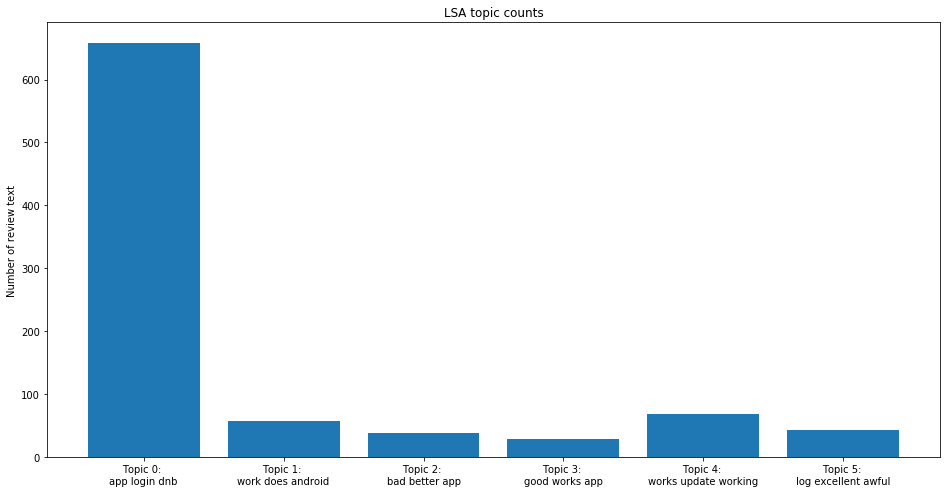

In [38]:
import matplotlib.pyplot as plt
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

In [39]:
from sklearn.manifold import TSNE
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 897 samples in 0.005s...
[t-SNE] Computed neighbors for 897 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 897 / 897
[t-SNE] Mean sigma: 0.035312
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.707272
[t-SNE] KL divergence after 2000 iterations: 0.639808


In [40]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        reviews_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                reviews_in_that_topic.append(two_dim_vectors[i])    
        
        reviews_in_that_topic = np.vstack(reviews_in_that_topic)
        mean_review_in_that_topic = np.mean(reviews_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_review_in_that_topic)
    return mean_topic_vectors

In [41]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [42]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label

top_3_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)